In [1]:
#Import Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Remove warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the Dataset ***Note: You must change the path
Homes = pd.read_csv("C:/Users/SWhit/Downloads/RDC_Inventory_Core_Metrics_County_History.csv")

In [3]:
#Preview Dataset in Python
display(Homes.head())

,month_date_yyyymm,county_fips,county_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202403,48205,"hartley, tx",425000.0,0.1824,0.6915,12.0,-0.2500,-0.5102,161.0,...,444336.0,0.0990,0.3827,12.0,-0.2500,-0.5385,0.0833,NaN,0.0017,1.0
1,202403,27133,"rock, mn",309900.0,0.0376,0.2689,21.0,0.0244,-0.2500,53.0,...,397205.0,0.0321,0.2890,35.0,0.0145,0.1111,0.6190,-0.0395,0.2798,1.0
2,202403,40019,"carter, ok",199000.0,-0.0499,-0.0328,165.0,-0.0030,0.4865,61.0,...,306719.0,-0.0234,-0.0577,222.0,0.0207,0.2299,0.3576,0.0132,-0.2911,0.0
3,202403,42083,"mckean, pa",169000.0,-0.0663,0.3000,48.0,-0.0400,-0.1652,107.0,...,187270.0,-0.0467,0.2149,71.0,-0.1069,-0.1288,0.5208,-0.0892,0.1382,0.0
4,202403,1055,"etowah, al",248950.0,-0.0130,0.1609,236.0,0.0876,0.2826,50.0,...,296370.0,-0.0180,0.2054,303.0,0.0783,0.1744,0.2839,-0.0133,-0.1074,0.0


In [4]:
#Categorical Variables Clean: Split County Name and State Column
Homes[['county', 'state']] = Homes['county_name'].str.split(',', expand=True)

In [5]:
#Categorical Variables Clean: Split Year and Month
Homes['month_date_yyyymm'] = pd.Series(Homes['month_date_yyyymm'], dtype="string")
Homes['year'] = Homes['month_date_yyyymm'].str[0:4]
Homes['month'] = Homes['month_date_yyyymm'].str[-2:]
display(Homes.head())

,month_date_yyyymm,county_fips,county_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,county,state,year,month
0,202403,48205,"hartley, tx",425000.0,0.1824,0.6915,12.0,-0.2500,-0.5102,161.0,...,-0.2500,-0.5385,0.0833,NaN,0.0017,1.0,hartley,tx,2024,03
1,202403,27133,"rock, mn",309900.0,0.0376,0.2689,21.0,0.0244,-0.2500,53.0,...,0.0145,0.1111,0.6190,-0.0395,0.2798,1.0,rock,mn,2024,03
2,202403,40019,"carter, ok",199000.0,-0.0499,-0.0328,165.0,-0.0030,0.4865,61.0,...,0.0207,0.2299,0.3576,0.0132,-0.2911,0.0,carter,ok,2024,03
3,202403,42083,"mckean, pa",169000.0,-0.0663,0.3000,48.0,-0.0400,-0.1652,107.0,...,-0.1069,-0.1288,0.5208,-0.0892,0.1382,0.0,mckean,pa,2024,03
4,202403,1055,"etowah, al",248950.0,-0.0130,0.1609,236.0,0.0876,0.2826,50.0,...,0.0783,0.1744,0.2839,-0.0133,-0.1074,0.0,etowah,al,2024,03


In [6]:
#For the purpose of the proect we only need some of the columns.   We can select them and rename the data.
Homes = Homes[['year', 'month', 'county', 'state', 'median_listing_price', 'active_listing_count', 'median_days_on_market', 'new_listing_count', 
               'price_increased_count', 'price_reduced_count', 'pending_listing_count', 'median_square_feet', 'average_listing_price',
               'total_listing_count']] 

display(Homes.head())

,year,month,county,state,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_square_feet,average_listing_price,total_listing_count
0,2024,03,hartley,tx,425000.0,12.0,161.0,0.0,0.0,0.0,1.0,3024.0,444336.0,12.0
1,2024,03,rock,mn,309900.0,21.0,53.0,8.0,0.0,0.0,13.0,2016.0,397205.0,35.0
2,2024,03,carter,ok,199000.0,165.0,61.0,56.0,0.0,40.0,59.0,1633.0,306719.0,222.0
3,2024,03,mckean,pa,169000.0,48.0,107.0,12.0,0.0,8.0,25.0,1898.0,187270.0,71.0
4,2024,03,etowah,al,248950.0,236.0,50.0,128.0,0.0,60.0,67.0,1894.0,296370.0,303.0


In [21]:
Homes.shape

(288386, 14)

In [25]:
#Find missing Values
mean = Homes.mean(numeric_only=True)
Homes.fillna(value=mean, inplace=True)

In [26]:
Homes.shape

(288386, 14)

In [19]:
# Calculate summary statistics for the weight feature
round(Homes.describe())

,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_square_feet,average_listing_price,total_listing_count
count,288386.0,288386.0,288386.0,288386.0,288386.0,288386.0,288386.0,288386.0,288386.0,288386.0
mean,252879.0,290.0,75.0,135.0,10.0,81.0,153.0,1875.0,350860.0,430.0
std,210885.0,849.0,36.0,404.0,47.0,299.0,473.0,407.0,470720.0,1259.0
min,1311.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,5000.0,0.0
25%,140000.0,26.0,50.0,8.0,0.0,4.0,7.0,1629.0,181522.0,36.0
50%,204475.0,74.0,69.0,24.0,0.0,14.0,30.0,1828.0,266802.0,105.0
75%,307450.0,229.0,93.0,88.0,2.0,48.0,144.0,2055.0,403008.0,322.0
max,13000000.0,23255.0,365.0,9888.0,1666.0,12596.0,14210.0,30902.0,142882807.0,33577.0


In [12]:
#Dispay Unique Categorical Columns and how often they appears
print("Unique State Count: " +str(Homes.state.nunique()))
print(Homes.state.value_counts())
print("Unique Year Count: " +str(Homes.year.nunique()))
print(Homes.year.value_counts())
print(Homes.month.value_counts())

Unique State Count: 51
state
 tx    23041
 ga    14730
 va    11979
 ky    11156
 mo    10694
 ks     9499
 il     9474
 nc     9300
 ia     9207
 tn     8835
 in     8556
 oh     8184
 mn     8091
 ne     7984
 mi     7719
 ms     7563
 ok     7067
 ar     6975
 wi     6696
 fl     6231
 pa     6231
 al     6224
 la     5952
 co     5898
 ny     5766
 ca     5394
 sd     5288
 wv     5115
 mt     5094
 nd     4740
 sc     4278
 id     4086
 wa     3626
 or     3347
 nm     3021
 ut     2695
 ak     2389
 md     2232
 wy     2139
 nj     1953
 nv     1566
 me     1488
 az     1395
 vt     1302
 ma     1302
 nh      930
 ct      744
 ri      465
 hi      372
 de      279
 dc       93
Name: count, dtype: int64
Unique Year Count: 10
year
2023    37304
2019    37266
2022    37259
2018    37250
2020    37247
2021    37212
2017    37063
2016    18455
2024     9329
qual        1
Name: count, dtype: Int64
month
10    24828
09    24826
08    24821
11    24808
07    24806
01    24804
03    24803

In [ ]:
##MARK DOWN BOX FOR DATA DESCRIPTION

In [52]:
#Set-up the relationship between features and response variables. 
x = Homes.drop("median_listing_price", axis=1)
y = Homes.median_listing_price

TypeError: scatter_subset() got an unexpected keyword argument 'hue_order'

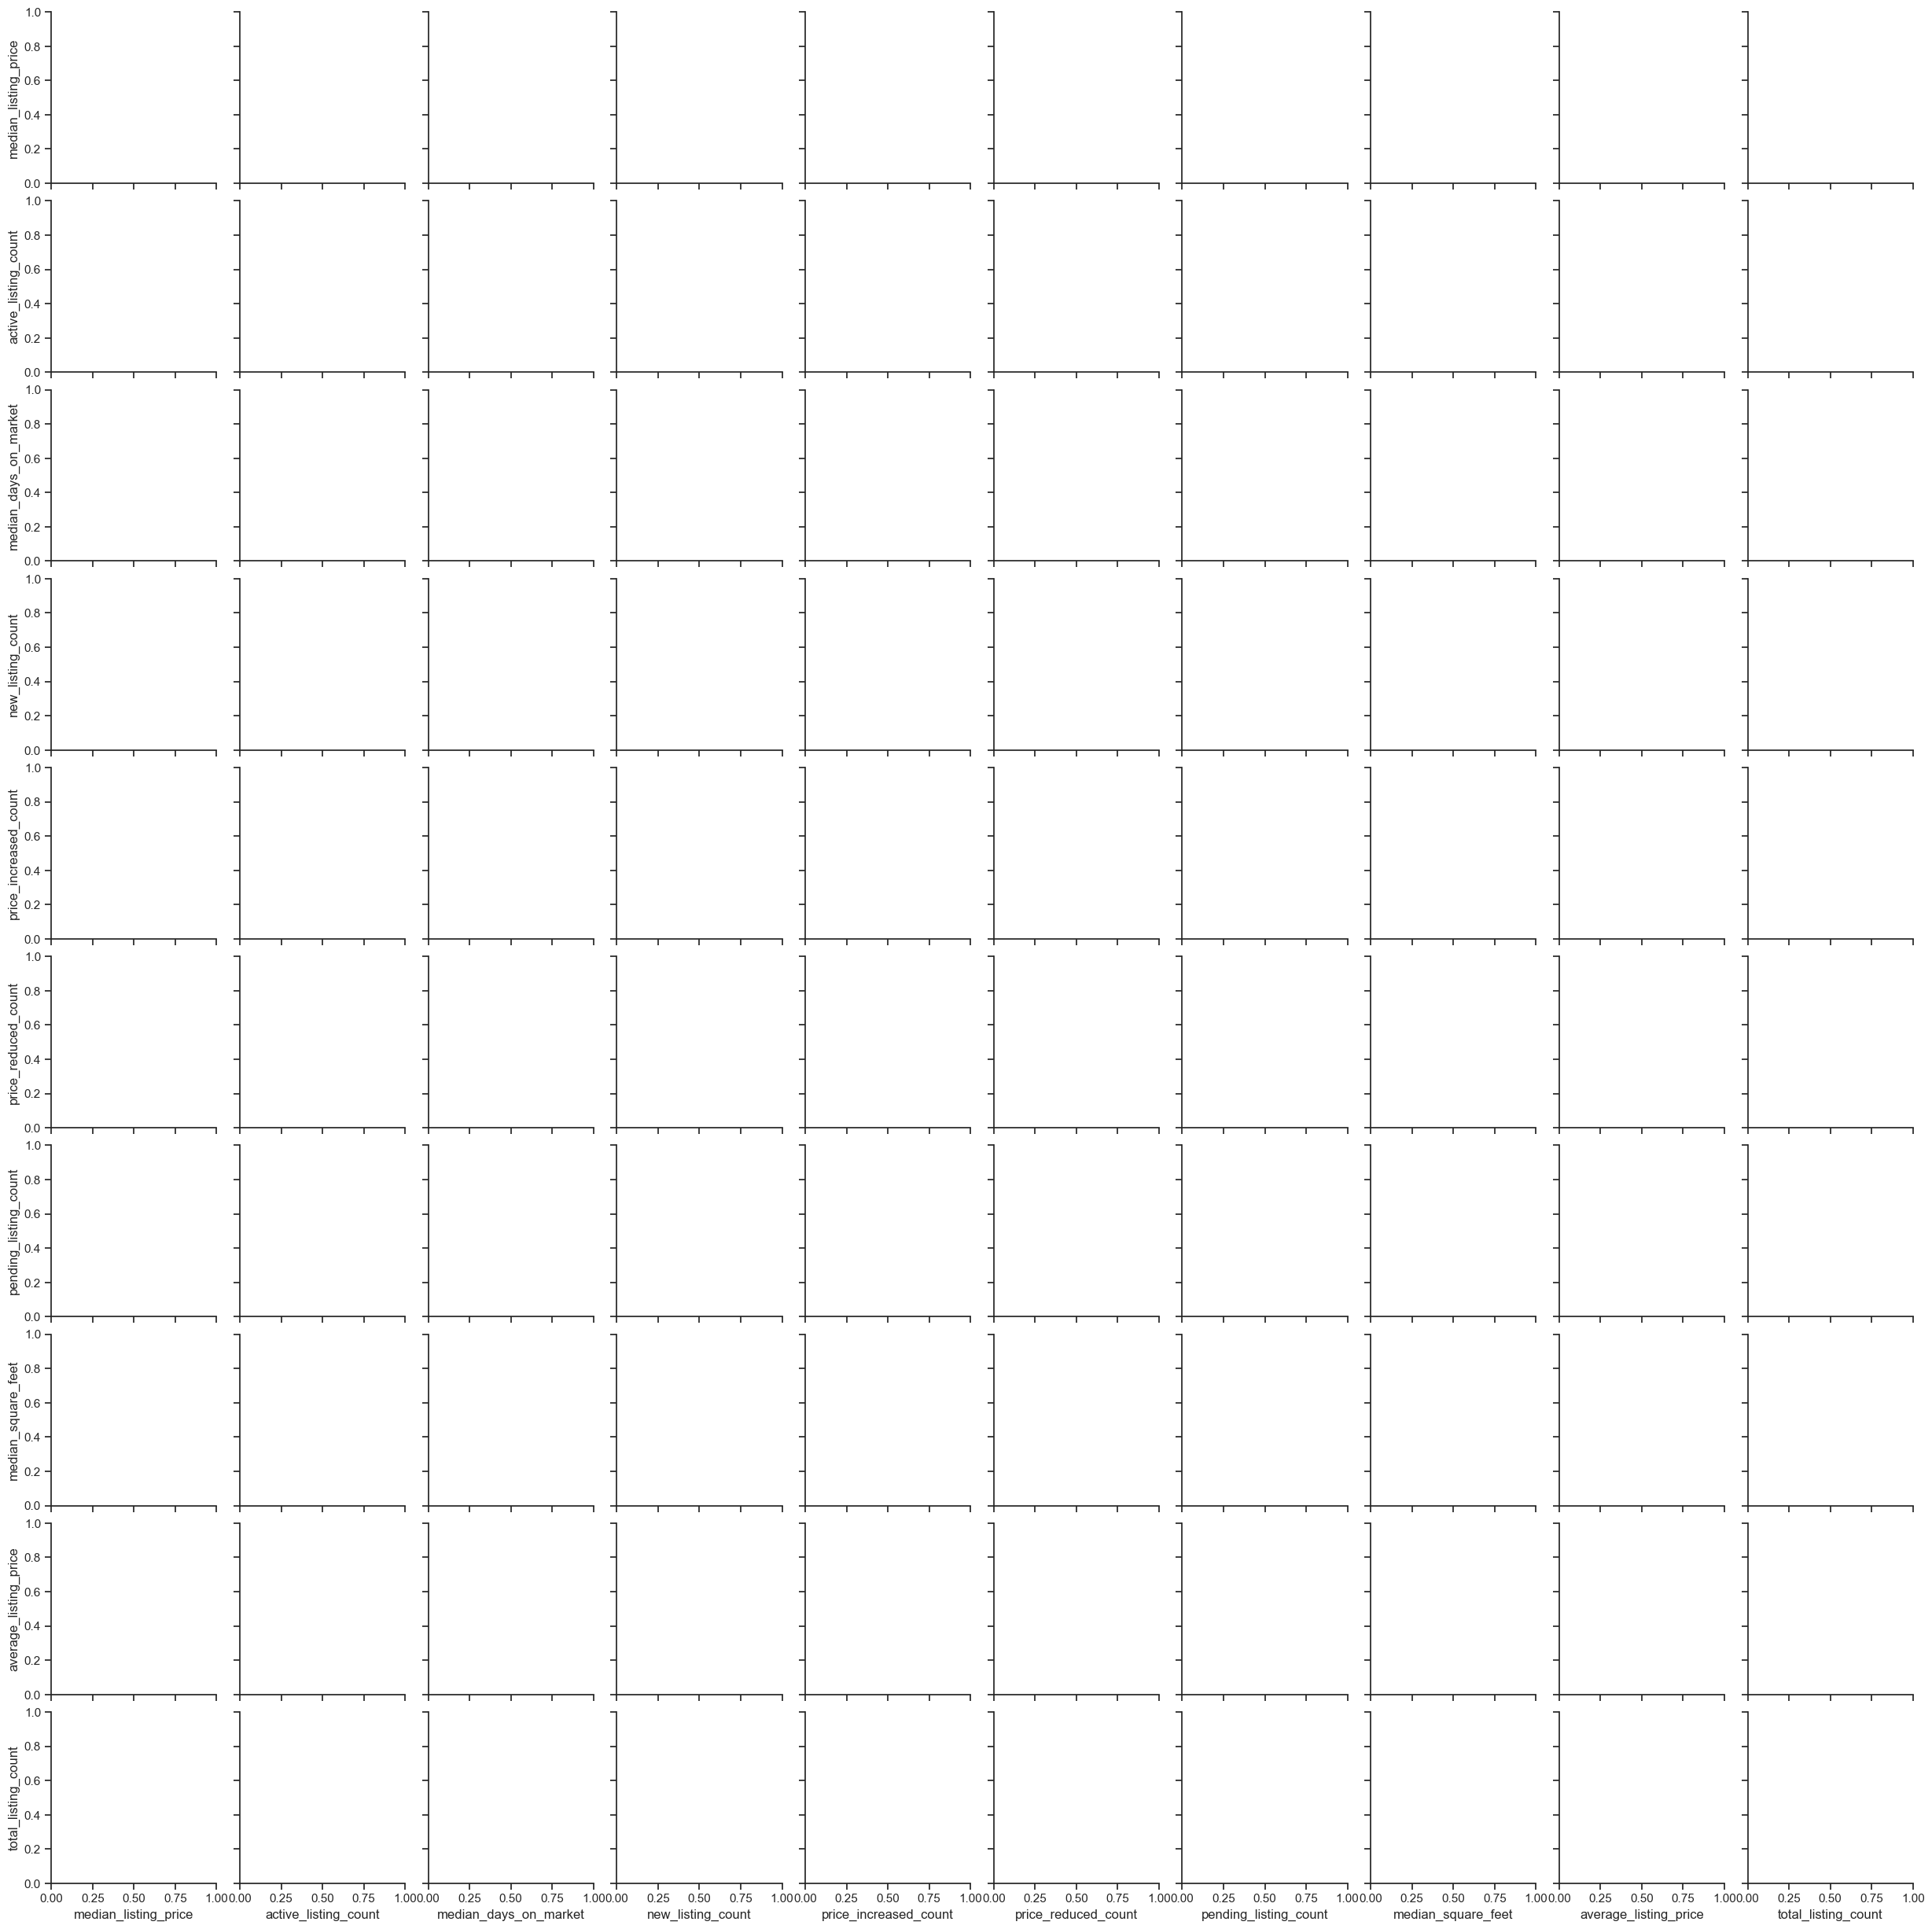

In [54]:
def scatter_subset(x, y, hue, mask):
    sns.scatterplot(x=x[mask], y=y[mask], hue=hue[mask])

g = sns.PairGrid(Homes, hue="month", diag_sharey=False)
g.map_lower(scatter_subset, mask=Homes["state"] == 'tx')
g.map_upper(scatter_subset, mask=Homes["state"] != 'tx')
g.map_diag(sns.kdeplot, fill=True, legend=False)
g.add_legend()

In [34]:


from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=10000, random_state = 50), 
    threshold="median")

In [36]:
X.shape

(288386, 13)

In [41]:
select.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [40]:
#visualize the relationship between features and response variables. 
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
standDev = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=standDev, ax=ax)
ax.set_title("feature Importance Using MDI")
ax.set_ylabel("Mean Decrease in Impurity")
fig.tight_layout()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
#### DO NOT RUN THIS CELL!!! Exampe codes for the EDA

# Visualize the relationship between each pair of numerical variables
sns.pairplot(data=hawks, hue='Species')

# Calculate the mean for each feature according to each species.

## pandas makes calculating statistics of groups easy with the groupby function.
hawks.groupby('Species').mean()

# Calculate the maximum for each feature according to each species.
hawks.groupby('Species').max()

# Plot the distribution of hallux length to determine a good cutoff
sns.histplot(data=hawks, x='Hallux', hue='Species')

# Remap the extreme outliers
## Adjust the cutoff to remap obviously wrong Hallux lengths to the correct units.
## Change this value and rerun this cell and the cell below until happy with the results.
cutoff = 200
hawks.loc[hawks['Hallux'] > cutoff, 'Hallux'] = (
    hawks.loc[hawks['Hallux'] > cutoff, 'Hallux'] / 10


# Plot to see if all obvious outliers have remapped.
sns.pairplot(data=hawks, hue='Species')



# Make a scatter plot with weight on the x-axis and miles per gallon on the y-axis
sns.scatterplot(data=mpg, x='weight', y='mpg', hue='cylinders')